In [ ]:
import numpy as np
import warnings
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Input,Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPool2D
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input

In [21]:
from google.colab import drive
drive.mount('/content/drive')

!pwd
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
Animal	drive  sample_data


In [ ]:
!unzip '/content/drive/MyDrive/Mammal/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Animal/train/cat/pixabay_cat_003879.jpg  
  inflating: Animal/train/cat/pixabay_cat_003880.jpg  
  inflating: Animal/train/cat/pixabay_cat_003881.jpg  
  inflating: Animal/train/cat/pixabay_cat_003882.jpg  
  inflating: Animal/train/cat/pixabay_cat_003883.jpg  
  inflating: Animal/train/cat/pixabay_cat_003884.jpg  
  inflating: Animal/train/cat/pixabay_cat_003885.jpg  
  inflating: Animal/train/cat/pixabay_cat_003886.jpg  
  inflating: Animal/train/cat/pixabay_cat_003887.jpg  
  inflating: Animal/train/cat/pixabay_cat_003888.jpg  
  inflating: Animal/train/cat/pixabay_cat_003889.jpg  
  inflating: Animal/train/cat/pixabay_cat_003891.jpg  
  inflating: Animal/train/cat/pixabay_cat_003892.jpg  
  inflating: Animal/train/cat/pixabay_cat_003893.jpg  
  inflating: Animal/train/cat/pixabay_cat_003894.jpg  
  inflating: Animal/train/cat/pixabay_cat_003895.jpg  
  inflating: Animal/train/cat/pixabay_cat_003897.jpg  
  inflating: A

In [ ]:
#!unzip '/content/test1.zip'
#!unzip '/content/train.zip'

In [ ]:
imageSize = 224
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="/content/Animal/train",target_size=(imageSize,imageSize))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="/content/Animal/val", target_size=(imageSize,imageSize))

Found 13496 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
# load the model
model = Sequential()

#BLOCK 1
model.add(Conv2D(input_shape=(imageSize,imageSize,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
#model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#BLOCK 2
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#BLOCK 3
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#BLOCK 4
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#BLOCK 5
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

#BLOCK 6
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=5, activation="softmax"))

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=5)


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


100/100 [==============================] - 19s 186ms/step - loss: 0.0764 - accuracy: 0.9756 - val_loss: 0.7691 - val_accuracy: 0.8156
Epoch 2/5
100/100 [==============================] - 21s 210ms/step - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.5352 - val_accuracy: 0.8250
Epoch 3/5
100/100 [==============================] - 19s 185ms/step - loss: 0.0686 - accuracy: 0.9796 - val_loss: 0.8898 - val_accuracy: 0.8094
Epoch 4/5
100/100 [==============================] - 20s 198ms/step - loss: 0.0556 - accuracy: 0.9797 - val_loss: 0.8084 - val_accuracy: 0.8125
Epoch 5/5
100/100 [==============================] - 18s 177ms/step - loss: 0.0454 - accuracy: 0.9853 - val_loss: 0.6847 - val_accuracy: 0.8406


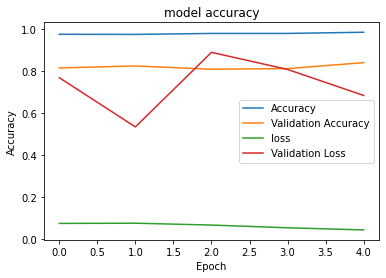

In [26]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

Elephant


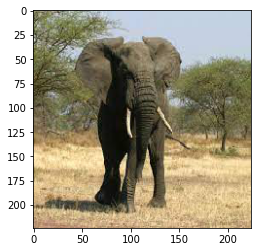

In [28]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/Mammal/TESTING/test0.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = model.predict(img)
max = np.argmax(output)
if(max == 0):
  print("Elephant")
elif(max == 1):
  print("Horse")
elif(max == 2):
  print("Lion")
elif(max == 3):
  print("Cat")
elif(max == 4):
  print("Dog")
